## Extending to four Component PR EOS

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
import pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

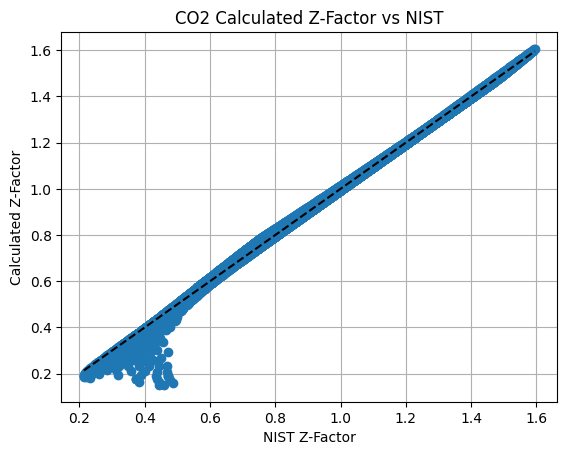

Average Relative error: 0.009277833920534662
99% of data better than error: 0.05056534799560608


In [2]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2 = 1.0, 0.0, 0.0
df = pd.read_excel('Pure_Components.xlsx', sheet_name='CO2')
degfs = np.array(df['degF'])
psias = np.array(df['psia'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('CO2 Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

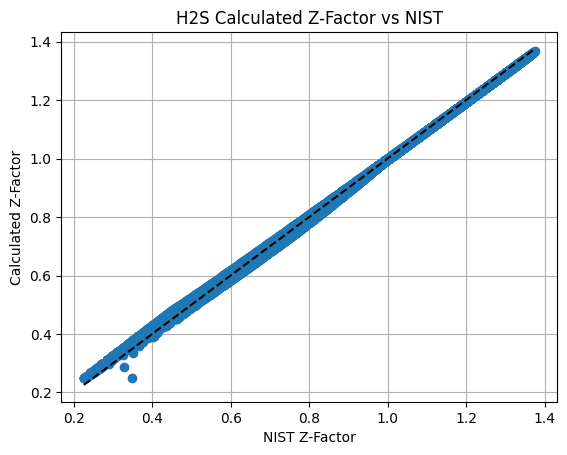

Average Relative error: 0.015830282750163575
99% of data better than error: 0.08024752166225958


In [3]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 1.0, 0.0
df = pd.read_excel('Pure_Components.xlsx', sheet_name='H2S')
degfs = np.array(df['degF'])
psias = np.array(df['psia'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('H2S Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

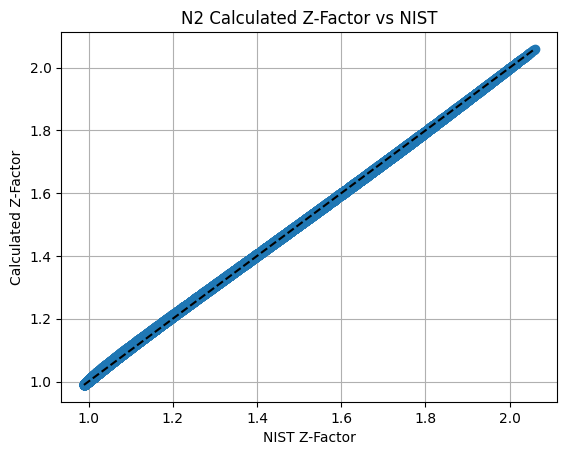

Average Relative error: 0.003741705781539882
99% of data better than error: 0.012086200593007477


In [4]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 0.0, 1.0
df = pd.read_excel('Pure_Components.xlsx', sheet_name='N2')
degfs = np.array(df['degF'])
psias = np.array(df['psia'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('N2 Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

0.802 0.8793006282659159 200 1000 0.8707050017259234 0.0287 0.2327 0.0304


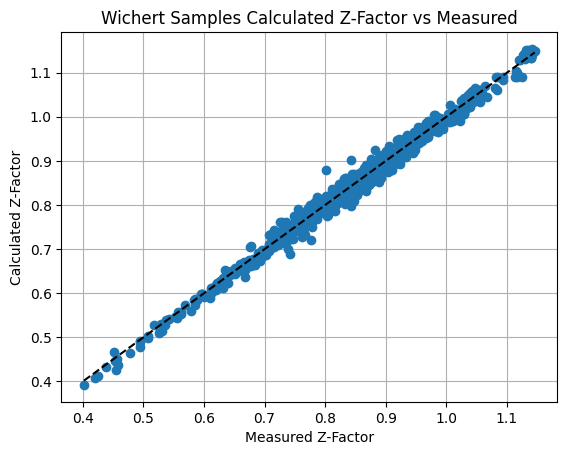

Average Relative error: 0.010901369040710417
99% of data better than error: 0.04632509742566153


In [5]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
    if Zs[i]<0.82 and calc_Zs[i]>0.85:
        print(Zs[i], calc_Zs[-1], degfs[i], psias[i], sgs[i], co2s[i], h2ss[i], n2s[i])
calc_Zs = np.array(calc_Zs)

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))